# **적조 예측을 위한 국내 해양데이터 분석** #


## 부산대학교 정보융합공학과 김형건, 김태훈, 손기수 ##

---
### 주제를 선정 배경 - 적조 예측 ###
- **적조 현상은 막대한 피해금액이 발생됩니다.**
- **이를 방지하기 위해서는 적조 예측이 필요합니다.**
- **그러나, 기존 데이터 수집 방법은 많은 비용이 요구됩니다.**
- **JOISS 등의 공개 데이터를 활용하여서 데이터 수집 비용을 절감하고자 시도하였습니다.**
    
#### 본 분석에서는 데이터를 다음과 같이 활용하였습니다. ####
![process](https://i.imgur.com/syo9GHk.png)
> **데이터 활용 순서**

- **적조의 요인을 분석**하여 관련된 데이터 선정하였습니다. 
- 이후 선정된 **데이터 간의 조합** 및 **전처리**를 수행하였습니다.
- 가공한 데이터를 사용하여 **모델 형성** 및 **예측값을 분석**하였습니다.
---

# **목차** #

## **1.서론** ##
- **1.1.적조와 코클로디니움**
- **1.2.코클로디니움의 확산**
- **1.3.코클로디니움의 대규모 발생 원인**
    
## **2.데이터 활용 및 분석** ##
- **2.1.데이터 추출**
- **2.2.데이터 정제**
- **2.3.데이터 활용**
- **2.4.데이터 분석**

## **3.결론** ##
- **3.1.기대효과 및 의의**
- **3.2.기존 적조 예측 모델 소개**

## **4.참고문헌** ##

## **5.부록** ##
- **5.1.전체 수행 코드**
- **5.2.적조 밀도 데이터 크롤링 코드**
---

---
## 1. 서론 ##

### 1.1 적조와 코클로디니움 ###


![fig1](https://i.imgur.com/CBhGDI3.png)
> **그림 1. 적조로 인한 피해 금액**

**적조**란 플랑크톤이 대량으로 번식하여서 **바닷물의 색이 변하는 현상**을 말합니다.

적조로 인해서 **수산업 등에 막대한 피해가 꾸준히 발생**하고 있습니다.

**적조 피해 금액**이 낮아지는 추세이지만 여전히 **수백억**에 달합니다.


![fig2](https://i.imgur.com/GYvMaDe.png)
> **그림 2. 연도별 최초 적조 생물군 발생 비율**

우리 나라에서 발생하는 유해 적조 생물을 분석한 결과 주로 **코클로디니움(Coholdinium)** 으로 나타났습니다.


![fig3](https://i.imgur.com/GWQfZFH.png)
> **그림 3. 연도별 최초 적조 생물군 발생 비율**

2002년에서 2013년도 국내 코클로디니움 발생 지역을 분석한 결과 주로 **남해안**과 **남해안에서 동해안으로 분포**하는 것으로 나타났습니다.


### 1.2 적조와 코클로디니움 ###

![fig4](https://i.imgur.com/pP3OKh0.png)
> **그림 4. 우리나라 근해의 해류**

적조는 전해역에서 발생이 가능하지만, **국내 최초 발생지는 남해**인 것으로 조사되었습니다.

**남해에서 발생된 적조**가 **대마 난류에 의해서 동해로 확산**됩니다.

<img src="https://i.imgur.com/SpexMcr.png" width="600px">

#### **그림 5. 국내 코클로디니움 최초 발생 지역** ####

**국내 적조 탐지**는 **최초 발생 지역에 대한 적조 현상 예측이 중요**합니다.
본 분석에서는 **국내 적조 최초 발생 지역인 남해에 집중**하였습니다.


### 1.3 코클로디니움의 대규모 발생 원인 ###

![fig6](https://i.imgur.com/hUJy5DE.png)
> **그림 6. 09~20년도 월별 코클로디니움 발생 빈도**

기존에 알려진 **일반 적조 현상의 원인**은 **수온, 일조량, 강수량 상승**입니다.

**강수의 경우, 육지의 영양염류 유입**으로 인한 **부영양화**로 **대규모 적조를 유발**합니다.

**세 가지 요건이 갖추어지는 여름철(하반기)에 코클로디니움의 발생 빈도가 증가**한다는 것을 확인하였습니다.

![fig7](https://i.imgur.com/JO15PC9.png)
> **그림 7. 해양+기상 데이터와 코클로디니움 밀도의 상관관계 분석**

저희는 **일반 적조가 아닌 코클로디니움의 관련 요인을 분석**하고자 하였습니다.

**JOISS 데이터인 화양지역 바다 데이터와 코클로디니움 밀도간의 상관관계 분석을 수행**하였습니다.

분석 결과, 기존에 적조 관련 원인으로 알려진 **수온** 외에도 **염분, 풍속**이 **코클로디니움과 상관 계수가 높다**는 것을 분석하였습니다.

데이터 활용 부분에서 코클로디니움을 탐지하기 위해서 **수온, 일조량, 강수량과 염분, 풍속**을 **주요 요인**으로 사용하였습니다.

---

---
## 2. 데이터 활용 및 분석 ##



### 2.1 데이터 추출 ###

![data2](https://i.imgur.com/xtZ7gqe.png)
> **데이터 추출 및 조합**

저희는 JOISS 및 연계 기관 등의 공공데이터 4 개를 활용하여서 적조 최초 발생 위치인 고흥, 여수 위치에 대한 적조, 해수, 기상 데이터를 조합하였습니다.

조합한 데이터 예시는 위 그림과 같습니다.

*참고) Wtemp-수온, Solidity-염분, WindSpeed-풍속, Temp-기온, Sunshine-일조량, Rainfall-강수량, Density-적조 밀도*
*참고) 수온, 염분, 풍속, 기온은 평균 값을, 일조량, 강수량은 총합 값을, 적조 밀도는 최대 값을 사용*


### 2.2 데이터 정제 ###

![fig8](https://i.imgur.com/oFGfDGe.png)
> **그림 8. 전처리 작업 전 데이터**

데이터 조합한 순수한 데이터를 시각화한 그래프입니다.

**이상 데이터가 존재**하는 것을 확인할 수 있습니다.

특히 이상 데이터로 인해서 기온의 그래프는 위쪽으로, 적조 밀도의 경우아랫쪽으로 편향되었습니다.

저희는 분석에 앞서 일반적으로 수행하는 전처리 외에도 **데이터를 직접 분석하는 추가 수작업 전처리를 아래와 같이 진행**하였습니다.

![preprocessing](https://i.imgur.com/sltsoVW.png)
> **사용한 전처리 방법**

#### 1. 추가 이상치 제거 #### 

사전 조사를 통해서 **현실적이지 않은 값을 기기 오작동으로 판단하고 제거**하였습니다.

*예) 염분양 10 이하 - 바닷물은 염분양이 10 이하가 될 수 없음, 기온 영하 -33.2도 이하*

#### 2. 학습데이터 균형 조율 #### 

학습 모델의 목적에 맞추어서 **적조가 발생하지 않은 2년의 데이터를 삭제**하였습니다.

*참고)시계열 데이터에서는 예측하고자 하는 대상의 값이 존재하지 않는 구간이 많은 경우에 모델 형성시 성능저하를 일으키기 때문에 제거*

#### 3. 임계치 보정 #### 

적조(코클로디니움)의 밀도 값의 최대-최소 값의 범위가 넓었습니다.
원활한 학습을 위해서 **유의미한 값을 고려**하여서 **상하단 코딩을 수행**하였습니다.

*참고) 데이터 적조 밀도 값 범위 : 1 ~ 34800*

*참고) 실제 해양수산부에서 적조로 판단하는 밀도 : 적조 예보 - 10, 적조 주의보 - 100, 적조 경보 - 1000*

![fig9](https://i.imgur.com/fk6hi7u.png)
> **그림 9. 전처리 작업 후 데이터**

일반적인 전처리 및 수작업 전처리를 수행 이후의 데이터를 시각화한 그래프입니다.

**이상 데이터가 제거**되어 편향되지 않은 그래프가 되었습니다.

해당 데이터를 사용하여서 모델 구성을 수행하였습니다.


### 2.3 데이터 활용 ###

#### 예측 모델의 딥러닝 기법 선정 ####

![fig10](https://i.imgur.com/OCTU5Sg.png)
> **그림 10. LSTM Network**

**LSTM Network는 새로운 입력 값과 이전 레이어에서 생성된 값들을 동시에 고려**합니다. 

이러한 특징 때문에 장, 단기간 **시계열 예측에 주로 사용**됩니다. 

**본 분석에서는 시간의 경과에 따른 적조 발생을 예측하기위해서 LSTM 모델을 선택**하였습니다.

- 1970년 이후 코클라디니움 출현율 상승 추세
- 기후온난화 등의 장기간의 점진적인 변화 고려 필요
- 긴 의존 기간을 필요로 하는 학습 수행시 우수한 성능

<img src="https://i.imgur.com/S1FmyZD.png" height="100px" width="300px">


#### **RNN, LSTM 예측값 비교** ####

**시계열 데이터를 분석하는 모델은 RNN과 LSTM** 이 존재합니다.

실험 결과 본 분석에는 **LSTM이 더 적합한 것을 확인**하였습니다.


#### 최적 예측 모델 탐색 과정 ####

![fig11](https://i.imgur.com/w0eBGGM.png)
> **그림 11. PCA(주성분 분석) 적용 data 활용 적조예측 모델**

성능 개선을 위해서 **주성분 분석을 수행**하였습니다.

그 결과 차원 감소로 인해 생기는 **학습 효과 보다 정보 손실이 더욱 큰 것을 확인**하였습니다.

최종 모델 구축에서는 주성분 분석을 사용하지 않았습니다.

![fig12](https://i.imgur.com/PfAYxA6.png)
> **그림 12. Hypterparameter 최적화 전 예측 모델 결과 **

성능 개선을 위해서 모델의 **Hyperparameter 최적화를 수행**하였습니다.

*최적화 탐색 대상 : layer, Activate function, Epoch, Batch size, Prediction preiod, Optimizer, Loss function, learning rate, Val setp*

위 그림은 모델에 대한 Hyperparameter 최적화 이전의 예측 그래프 입니다.


#### 예측 모델 구상 ####

![fig13](https://i.imgur.com/cx0ShVr.png)
> **그림 13. 남해안 적조발생 해역(2011~2021)**

- Step1 모델 훈련 : 여수(학동), 고흥(발포) 조위관측소 데이터
- Step2 모델 검증 : 여후(화양) 연안정지관측 데이터
- Step3 코클로디니움 밀도 100cells/ml 이상 예상일 검출 **(적조주의보 기준)**
- Step4 모델 평가 : Accuracy, Recall, Precision

![option1](https://i.imgur.com/9FPGAxm.png)
> **모델 최종 설정 값**

위 그림과 같이 탐색을 통해서 최적의 모델 Hyperparameter를 설정하였습니다.


### 2.4 데이터 분석 ###


#### 예측 결과 ####

![fig14](https://i.imgur.com/cOmRcZX.png)
> **그림 14. 코클로디니움 밀도 예측 그래프**

*파랑색 선 - 실제 값, 주황색 선 - 예측 값

본 그림은 **학습한 LSTM 모델**을 이용하여서 **코클로디니움 밀도를 예측한 결과** 입니다.

LSTM 모델이 **적조 발생에 대해서 예측이 가능하다는 것을 확인** 할 수 있습니다.

**적조 발생 이전에 미리 예측이 가능한 것을 입증**하였습니다. **(Recall 96.4%)**

적조 발생 탐지에서 적조 발생을 잘못 예측하는 것보다 **적조 발생을 탐지하지 못하는 것이 경제적 손실 등의 피해가 큽**니다.

따라서 본 분석에서는 가지고 있는 **데이터의 한계로 모델의 성능에 대해서** 미탐율을 보다 **오탐율이 최소가 되도록 학습을 수행**하였습니다.

![sub2](https://i.imgur.com/pzlZ2pi.png)
> **코클로디니움 밀도 예측 그래프 확대 사진**

**본 데이터의 한계**는 다음과 같습니다.
- **적조 발생 데이터 적조 발생을 하였을때만, 코클로디니움 밀도 측정을 수행함(적조 미발생일 실제값과 예측값이 다른 이유)**
- **적조 발생 시 데이터에서는, 코클로디니움 밀도 값을 매일 측정하지 않아서 데이터가 선형적이지 않음 (낮은 예측 정밀도 이유)**
- **적조 발생 이후 조치에 대한 데이터가 존재하지 않음(예측 데이터가 실제 데이터보다 느리게 코클로디닝움 밀도가 감소하는 이유)**

---
## 3. 결론 ##

### 3.1 기대효과 및 의의 ###

![data1](https://i.imgur.com/ov4eAOL.png)
> **공공데이터 활용의 장점**

**기존의 일반적인 연구 및 사업**에서의 **데이터 획득은 고가의 측정 장비와 분석 인프라 요구**합니다.

그 외에도 데이터 획득을 위해서 바다의 측정 포인트로 배를 타고 가야하는 등의 **많은 시간과 노력도 필요**합니다.

이와 반대로 **공공 데이터 활용**은 이러한 한계점을 갖지 않아서 **데이터 획득에 비용을 절감**할 수 있습니다.

**저희는 공공 데이터만을 활용**하여 일반적인 연구 및 사업에서의 **데이터 획득의 한계를 극복**하였습니다.


### 3.2 기존 적조 예측 모델 소개 ###

![models1](https://i.imgur.com/OEg8lUv.png)
> **기존 적조 예측 모델 특징 요약**

기존 적조 예측 모델들의 특징입니다. 

모두 고가의 측정 장비 및 분석 인프라를 사용하였습니다.

기존 모델들의 성능은 각각 다른 목표 및 지표를 사용하였습니다.

저희 분석은 공공데이터를 사용하였다는 점에서 운용해양예보시스템과 유사합니다.


### 3.3 요약 ###

- 사전 분석을 통해 **코클로디니움과 "염분", "풍속" 의 상관관계 파악**하였습니다.
- 학습된 모델 성능을 통해서 **코클로디니움과 "염분", "풍속" 상관관계를 입증**하였습니다.
- **고가의 특수 측정 장비 없이, 공공 데이터만으로 적조 발생 예측을 수행**하였고 **성능 입증**하였습니다.
- **적조 발생 예측 모델 학습을 위한 일치점 데이터셋 제작(해양+기상+적조)** 을 수행하였습니다.
- 적조 발생 예측 **모델의 미탐율이 90% 달성**하였습니다.
- **JOISS 데이터의 활용 가치 입증**하였습니다.
- **일치점 데이터셋 공개**하겠습니다.(추후 JOISS 전달 예정)
---

---
## 4. 참고 문헌 ##

- 2020. 해양수산부. 적조피해 최소화를 위한 적조탐지·예측시스템 구축 및 실증화 최종보고서
- 2007. 김병찬. 무선 센서 네트워크를 이용한 적조 모니터링 시스템의 설계 및 구현 
- 2005. 한국 연안에서의 적조형성과 기상인자간의 상관성에 대한 통계학적 해석 및 위성에 의한 적조 모니터링
- 2021. 기상청 날씨마루. https://bd.kma.go.kr/kma2020/fs/envSelect1.do?pageNum=5&menuCd=F050601000
- 2019. 박수호. 심층신경망을 활용한 Cochlodinium polykrikoides 적조 발생 예측 연구
- 2019. 해양수산부. 2019년 적조 대응 종합 대책
- 2018. 식품의약품안전평가원. 수산물 중 해양생물독소 사전 안전관리 기획 연구
- 2021. 국립수산과학원. 적조정보시스템. https://www.nifs.go.kr/red/main.red
- 2021. 국립수산과학원. 적조바로알기. https://www.nifs.go.kr/red/manual/redtide.pdf
- 2013. Tae Gyu Park. "Economic impact, management and mitigation of red tides in Korea". Harmful Algae Volume 30, Supplement 1, December 2013, Pages S131-S143
- 2014. 정해진. 유해성 코클로디니움 적조 발생 메커니즘 규명 및 예보 시스템 구축 기획연구에 관한 연구
- 2019. 박지은. 인공위성 고도계 자료와 해색 위성 자료 기반의 동해 중규모 소용돌이 탐지 비교. J. Korean Soc. Oceanogr. Vol.24, No.2, pp.282-297, 2019
- 2019. 해양수산부. 2019년 적조 대응 종합 대책
- 2018. KIOST. 「실시간 적조 탐지·예측 시스템」 구축 - 통영·여수 해역에서 시스템 구축 후 시범 운영 중 - 
- 2020. 한국해양과학기술원, 적조피해 최소화를 위한 적조탐지'예측시스템 구축 및 실증화 최종보고서
- 2006. 김태근, 유량-부하량 관계식을 이용한 용담호 유입하천의 영양염류 유입량 변동특성, 환경영향평가 제15권 제2호(2006) pp.129~138
- 2005. 윤홍주, 한국 연안에서의 적조형성과 기상인자간의 상관성에 대한 토계학적 해석 및 위성에 의한 적조 모니터링 
- 2019. Red tide detection using deep learning and high-spatial resolution optical satellite imagery. International Journal of Remote Sensing
- 2020. 임월애. 1970년대 이후 한국 연안의 적조 발생 변화. Journal of the Korean Society of Marine Environment & Safety Research Paper Vol. 26, No. 5, pp. 523-530, August 31, 2020, ISSN 1229-3431(Print) / ISSN 2287-3341(Online) 
- 2018. (주)네오엔비즈. 수산물 중 해양생물독소 사전 안전관리 기획 연구

---

# 5. 소스코드 #

## 5.1 전체코드 ##

## <해양 + 기상 + 일조일사량 + 적조 조합 - 화양> ##

In [ ]:
# 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
# 연안정지관측자료에서 화양 지역 데이터 로드 및 Period, Index 설정
df = pd.read_csv("../DATASET/JOISS_20070101_20171231_Coastal Oceanographic Observation_NIFS.csv", skiprows =23)
del_index = df.iloc[:,1].str.contains("화양")
df = df[del_index]
del_cols = [0,1,3,4,5,7,9,10]
df = df.drop(df.columns[del_cols],axis=1)
df = df.drop(df.columns[3:], axis = 1)
df.columns = ['Date', 'WTemp', 'Solidity']
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df = df.loc['2009':'2017']
df = df.round(1)
# 기상청 자료에서 화양(백야) 지역 기상 데이터 로드 및 Index 설정
df_kma = pd.read_csv("../DATASET/강수_일조_풍속/백야_2009_2017_기상데이터.csv", engine = 'python', encoding = 'cp949')
df_kma = df_kma.drop(df_kma.columns[:2], axis = 1)
df_kma.columns = ['Date', 'Temp', 'Rainfall', 'WindSpeed']
df_kma = df_kma.set_index('Date')
df_kma.index = pd.to_datetime(df_kma.index)
# 결측치 확인
df_kma.isnull().sum()
# 결측치 제거
df_kma = df_kma.fillna(0)
# 여수 지역 일조량 데이터 로드
del_cols = [0,1,3,4]
cols_name = ["Sunshine"]
sunshine_df = pd.read_csv("../DATASET/강수_일조_풍속/여수_1995_2021_일조일사량.csv", engine = 'python', encoding = 'cp949', skiprows=16, index_col = 2)
sunshine_df.index.name = "Date"
sunshine_df.index = pd.to_datetime(sunshine_df.index)
sunshine_df.drop(sunshine_df.columns[del_cols], axis=1, inplace = True)
sunshine_df.columns = cols_name
# 결측치 확인
sunshine_df.isnull().sum()
# 결측치 제거
sunshine_df = sunshine_df.fillna(0)
# 사용 기간 설정
sunshine_df = sunshine_df.loc['2009':'2017']
# 데이터 병합
merge_df = pd.concat([df,sunshine_df,df_kma], axis = 1)
# 결측치 보간
merge_df = merge_df.fillna(method ='ffill', limit = 5)
merge_df = merge_df.fillna(method ='bfill', limit = 5)
# 적조 발생 데이터 로드 및 여수 지역 발생 데이터 정제
df = pd.read_csv("../DATASET/red_tides_data/2009-2020.csv", engine = 'python', index_col = 0)
df = df[df.iloc[:,0].str.contains("여수")]
# 중복값 제거
df.index.duplicated()
df = df.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')
# 데이터 정제 및 해양&기상 데이터 합본과 병합 후 export
df['Density(max)'].replace('0','1')
df = df.drop(['Density(min)'], axis=1)
df.index = pd.to_datetime(df.index, format="%Y%m%d")
df = df.drop(['Location'], axis = 1)
df = df.loc['2009-07-11' : '2017-05-10']
final_df = pd.concat([merge_df, df], axis = 1)
final_df['Density(max)'].fillna(0, inplace = True)
final_df.rename(columns = {'Density(max)' : 'Density'}, inplace = True)
final_df.to_csv("../Learning/hwayang_refined_df.csv")

## < 여수 데이터 시간 단위 일치 - 일 단위> ##

In [ ]:
years = range(2009,2021)
del_cols = [0,3,4,5,6,8,9,11,12,13]
cols_name = ['WTemp', 'Solidity', 'WindSpeed', 'Temp']
df_summary = pd.DataFrame()
# 여수 지역 수질자동측정망 관측 자료 load 및 1일 단위로 데이터 정제
for year in years:
    path = "../DATASET/여수_2004-2020/여수_DT_9_%d_KR.txt"%year
    df = pd.read_csv(path,sep='\t', skiprows = 3, index_col=0)
    df.index = pd.to_datetime(df.index)
    df.drop(df.columns[del_cols],axis=1,inplace=True)
    df.index.name='date'
    df.columns = cols_name
    df.replace('-',np.NaN,inplace=True)
    df.fillna(method='ffill', limit = 3600)
    df=df.apply(pd.to_numeric)
    
    part_df_summary = pd.DataFrame()

    # 시계열 처리로 1일 단위 데이터 정제
    part_df_summary['WTemp_min'] = df.WTemp.resample('1D').min()
    part_df_summary['WTemp_max'] = df.WTemp.resample('1D').max()
    part_df_summary['WTemp_mean'] = df.WTemp.resample('1D').mean().round(1)
    part_df_summary['Solidity_min'] = df.Solidity.resample('1D').min()
    part_df_summary['Solidity_max'] = df.Solidity.resample('1D').max()
    part_df_summary['Solidity_mean'] = df.Solidity.resample('1D').mean().round(1)
    part_df_summary['WindSpeed_min'] = df.WindSpeed.resample('1D').min()
    part_df_summary['WindSpeed_max'] = df.WindSpeed.resample('1D').max()
    part_df_summary['WindSpeed_mean'] = df.WindSpeed.resample('1D').mean().round(1)
    part_df_summary['Temp_min'] = df.Temp.resample('1D').min()
    part_df_summary['Temp_max'] = df.Temp.resample('1D').max()
    part_df_summary['Temp_mean'] = df.Temp.resample('1D').mean().round(1)
    
    df_summary=pd.concat([df_summary, part_df_summary], axis = 0)
    # 여수지역 강수량 데이터 추출을 위해 기상청 데이터 호출
cols_name = ["rainfall"]
df = pd.read_csv("../DATASET/강수_일조_풍속/여수_1995_2021_일별강수량.csv", engine = 'python', encoding = 'cp949', skiprows=7, index_col = 0)
df.index.name = "date"
df.index = pd.to_datetime(df.index)
df.drop(df.columns[0], axis = 1, inplace = True)
df.columns = cols_name
df.fillna(0, inplace=True)
rainfall_df = df.loc['2009':'2020']
# 여수지역 일조량 데이터 추출
del_cols = [0,1,3,4]
cols_name = ["sunshine"]
df = pd.read_csv("../DATASET/강수_일조_풍속/여수_1995_2021_일조일사량.csv", engine = 'python', encoding = 'cp949', skiprows=16, index_col = 2)
df.index.name = "date"
df.index = pd.to_datetime(df.index)
df.drop(df.columns[del_cols], axis=1, inplace = True)
df.columns = cols_name
df.fillna(0, inplace=True)
sunshine_df = df.loc['2009':'2020']
# 데이터 병합
df = pd.read_csv("./MiningData/YeoSoo_khoa_df.csv",index_col = 0)
df.index = pd.to_datetime(df.index)
merge_df = pd.concat([df,sunshine_df,rainfall_df], axis = 1)
merge_df.to_csv("./MiningData/Yeosoo_merge_df.csv")

## <고흥/발포 데이터 시간 단위 일치 - 일 단위> ##

In [ ]:
years = range(2009,2021)
del_cols = [0,3,4,5,6,8,9,11,12,13]
cols_name = ['WTemp', 'Solidity', 'WindSpeed', 'Temp']
df_summary = pd.DataFrame()
# 고흥 지역 수질자동측정망 관측 자료 load 및 1일 단위로 데이터 정제
for year in years:
    path = "../DATASET/고흥발포_2004-2020/고흥발포_DT_92_%d_KR.txt"%year
    df = pd.read_csv(path,sep='\t', skiprows = 3, index_col=0)
    df.index = pd.to_datetime(df.index)
    df.drop(df.columns[del_cols],axis=1,inplace=True)
    df.index.name='date'
    df.columns = cols_name
    df.replace('-',np.NaN,inplace=True)
    df.fillna(method='ffill', limit = 3600)
    df=df.apply(pd.to_numeric)
    
    part_df_summary = pd.DataFrame()

    # 시계열 처리로 1일 단위 데이터 정제
    part_df_summary['WTemp_min'] = df.WTemp.resample('1D').min()
    part_df_summary['WTemp_max'] = df.WTemp.resample('1D').max()
    part_df_summary['WTemp_mean'] = df.WTemp.resample('1D').mean().round(1)
    part_df_summary['Solidity_min'] = df.Solidity.resample('1D').min()
    part_df_summary['Solidity_max'] = df.Solidity.resample('1D').max()
    part_df_summary['Solidity_mean'] = df.Solidity.resample('1D').mean().round(1)
    part_df_summary['WindSpeed_min'] = df.WindSpeed.resample('1D').min()
    part_df_summary['WindSpeed_max'] = df.WindSpeed.resample('1D').max()
    part_df_summary['WindSpeed_mean'] = df.WindSpeed.resample('1D').mean().round(1)
    part_df_summary['Temp_min'] = df.Temp.resample('1D').min()
    part_df_summary['Temp_max'] = df.Temp.resample('1D').max()
    part_df_summary['Temp_mean'] = df.Temp.resample('1D').mean().round(1)
    # 고흥발포 지역 강수량 데이터 추출
cols_name = ["rainfall"]
df = pd.read_csv("../DATASET/강수_일조_풍속/고흥_1995_2021_일별강수량.csv", engine = 'python', encoding = 'cp949', skiprows=7, index_col = 0)
df.index.name = "date"
df.index = pd.to_datetime(df.index)
df.drop(df.columns[0], axis = 1, inplace = True)
df.columns = cols_name
df.fillna(0, inplace=True)
rainfall_df = df.loc['2009':'2020']
# 고흥발포 지역 일조량 데이터 추출
del_cols = [0,1,3,4]
cols_name = ["sunshine"]
df = pd.read_csv("../DATASET/강수_일조_풍속/고흥_1995_2021_일조일사량.csv", engine = 'python', encoding = 'cp949', skiprows=16, index_col = 2)
df.index.name = "date"
df.index = pd.to_datetime(df.index)
df.drop(df.columns[del_cols], axis=1, inplace = True)
df.columns = cols_name
df.fillna(0, inplace=True)
sunshine_df = df.loc['2009':'2020']
# 데이터 합치기
df = pd.read_csv("./MiningData/Goheung_khoa_df.csv",index_col = 0)
df.index = pd.to_datetime(df.index)
merge_df = pd.concat([df,sunshine_df,rainfall_df], axis = 1)
merge_df.to_csv("./MiningData/Goheung_merge_df.csv")

## <적조 데이터 불러오기> ##

In [ ]:
df = pd.read_csv("../DATASET/red_tides_data/2009-2020.csv", engine = 'python', index_col = 0)
# 여수 데이터 저장
yeosoo_df = df[df.iloc[:,0].str.contains("여수")]
# 고흥 데이터 저장
goheung_df = df[df.iloc[:,0].str.contains("고흥")]
# 중복 데이터 확인 및 제거
yeosoo_df.index.duplicated().sum()
goheung_df.index.duplicated().sum()
yeosoo_df = yeosoo_df.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')
goheung_df = goheung_df.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')
yeosoo_df['Density(max)'].replace('0','1', inplace = True)
yeosoo_df.drop(['Density(min)'], axis=1, inplace = True)
yeosoo_df.index = pd.to_datetime(yeosoo_df.index, format="%Y%m%d")
yeosoo_df.drop(['Location'], axis = 1, inplace = True)
goheung_df.drop(['Location','Density(min)'], axis=1, inplace = True)
goheung_df.index = pd.to_datetime(goheung_df.index, format = "%Y%m%d")

## < 적조 데이터 조합하기> ##

In [ ]:
# 여수
df = pd.read_csv("./MiningData/Yeosoo_merge_df.csv",index_col=0)
df.dropna(inplace = True)
df.index.name = 'Date'
df.index = pd.to_datetime(df.index)
df1 = pd.concat([df, yeosoo_df], axis = 1)
df1['Density(max)'].fillna(0, inplace = True)
df1.dropna(inplace = True)
df1.to_csv("./MiningData/red_tide_null_0_yeosoo_df.csv")

In [ ]:
# 고흥
df = pd.read_csv("./MiningData/Goheung_merge_df.csv",index_col=0)
df.index.name = "Date"
df.index = pd.to_datetime(df.index)
df1 = pd.concat([df, goheung_df], axis = 1)
df1['Density(max)'].fillna(0,inplace = True)
df1.dropna(inplace = True)
df1.to_csv("./MiningData/red_tide_null_0_goheung_df.csv")

## < 지역 데이터 결합하기 > ##

In [ ]:
df_yeosoo = pd.read_csv('../DataMining/MiningData/red_tide_null_0_yeosoo_df.csv',index_col = False)
df_goheung = pd.read_csv('../DataMining/MiningData/red_tide_null_0_goheung_df.csv',index_col = False)
df = pd.concat([df_yeosoo,df_goheung])
df.reset_index(drop=True, inplace = True)
df = df.set_index('Date')

In [ ]:
# 필요 없는 칼럼 삭제 및 이름 변경
del_cols = [0,1,3,4,6,7,9,10]
df = df.drop(df.columns[del_cols], axis=1)
col_names = ['Wtemp', 'Solidity', 'WindSpeed', 'Temp', 'Sunshine', 'Rainfall', 'Density']
df.columns = col_names
df.drop(['Date'], axis = 1, inplace = True)
df.reset_index(drop=True, inplace = True)
del_cols = [0,1,3,4,6,7,9,10]
mean_df = df.drop(df.columns[del_cols], axis=1)
mean_df

In [ ]:
# Density 이상치 제거 및 numeric
mean_df.loc[2083, 'Density(max)'] = '650'
mean_df.loc[6257, 'Density(max)'] = '420'
mean_df.loc[1389,'Density(max)'] = '4100'
mean_df.loc[5220,'Density(max)'] = '480'
mean_df.loc[5535,'Density(max)'] = '4100'
mean_df.loc[5536,'Density(max)'] = '5200'
mean_df.loc[5537,'Density(max)'] = '2070'
mean_df.loc[5538,'Density(max)'] = '2240'
mean_df.loc[5539,'Density(max)'] = '1750'
mean_df.loc[5540,'Density(max)'] = '1020'
mean_df.loc[5541,'Density(max)'] = '970'
mean_df.loc[5542,'Density(max)'] = '950'
mean_df.loc[5543,'Density(max)'] = '920'
mean_df = mean_df.apply(pd.to_numeric)

In [ ]:
# 수온 이상치 제거
q3 = mean_df['Wtemp'].quantile(0.75)
q1 = mean_df['Wtemp'].quantile(0.25)
iqr = q3 - q1
minus_condition = q1 - 1.0*iqr
plus_condition = q3 + 1.0*iqr
mean_df = mean_df.drop(mean_df[mean_df['Wtemp'] > plus_condition].index)
mean_df = mean_df.drop(mean_df[mean_df['Wtemp'] < minus_condition].index)

In [ ]:
#염분 이상치 제거
mean_df = mean_df.drop(mean_df[mean_df['Solidity'] < 10].index)

In [ ]:
#기온 이상치 제거
mean_df = mean_df.drop(mean_df[mean_df['Temp'] < -7.0].index)

## <학습을 위한 데이터 전처리> ##

In [ ]:
def get_dens(v):
    if v < 10:
        density = 0
    elif v == 10:
        density = 1
    elif v < 1000:
        density = 2
    else:
        density = 3
    return density

In [ ]:
def get_Bdens(v):
    if v > 0:
        density = 1
    else:
        density = 0
    return density

In [ ]:
mean_df["Revised_Density"] = mean_df["Density"].apply(lambda v : get_dens(v))

In [ ]:
mean_df["B_Revised_Density"] = mean_df["Revised_Density"].apply(lambda v : get_Bdens(v))

In [ ]:
df.to_csv("./refined_df_except0910.csv")

## <데이터 정제> ##

In [ ]:
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import optimizers
plt.rcParams["figure.figsize"] = (20, 6)

In [ ]:
df = pd.read_csv('./refined_merge.csv', index_col = 0)
df

,Solidity,Wtemp,WindSpeed,Temp,Sunshine,Rainfall,Density,1000_Density,min-max_Density
0,31.9,7.0,6.4,-0.6,8.0,0.0,0.0,0.0,0.0
1,31.9,6.8,3.7,1.8,8.8,0.0,0.0,0.0,0.0
2,31.9,6.8,3.5,0.7,7.8,0.0,0.0,0.0,0.0
3,31.9,6.7,6.0,1.2,8.4,0.0,0.0,0.0,0.0
4,31.8,6.4,5.5,2.1,3.9,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8369,33.2,11.3,5.0,4.2,8.9,0.0,0.0,0.0,0.0
8370,32.1,9.8,5.9,1.7,9.0,0.0,0.0,0.0,0.0
8371,32.1,10.0,4.0,3.2,9.0,0.0,0.0,0.0,0.0
8372,33.4,9.9,1.5,4.6,8.6,0.0,0.0,0.0,0.0


In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop("index", axis = 1)

In [ ]:
df

,Solidity,Wtemp,WindSpeed,Temp,Sunshine,Rainfall,Density,1000_Density,min-max_Density
0,31.9,7.0,6.4,-0.6,8.0,0.0,0.0,0.0,0.0
1,31.9,6.8,3.7,1.8,8.8,0.0,0.0,0.0,0.0
2,31.9,6.8,3.5,0.7,7.8,0.0,0.0,0.0,0.0
3,31.9,6.7,6.0,1.2,8.4,0.0,0.0,0.0,0.0
4,31.8,6.4,5.5,2.1,3.9,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8004,33.2,11.3,5.0,4.2,8.9,0.0,0.0,0.0,0.0
8005,32.1,9.8,5.9,1.7,9.0,0.0,0.0,0.0,0.0
8006,32.1,10.0,4.0,3.2,9.0,0.0,0.0,0.0,0.0
8007,33.4,9.9,1.5,4.6,8.6,0.0,0.0,0.0,0.0


In [ ]:
TRAIN_SPLIT = 6546

6546

In [ ]:
# Density 값이 1000 이상일 경우 1000으로 고정

def get_dens(v):
    if v >= 1000:
        density = 1000
    else:
        density = v
    return density

# get_dens(v) 함수 적용
df["1000_Density"] = df["Density"].apply(lambda v : get_dens(v))

# min_max_normalization 적용 column 생성
df['min-max_Density'] = (df["1000_Density"] - df["1000_Density"].min()) / 1000

# Oversampling을 위해 데이터 복제
df['Oversample_Density'] = df['1000_Density']

In [ ]:
# # Oversampling 1. 앞 쪽 데이터 증식

for i in range(2,TRAIN_SPLIT):
    if df['Oversample_Density'].iloc[i-2] == 0 and df['Oversample_Density'].iloc[i-1] == 0 and df['Oversample_Density'].iloc[i] != 0:
        df['Oversample_Density'].iloc[i-2] = (df['Oversample_Density'].iloc[i])*1/3
        df['Oversample_Density'].iloc[i-1] = (df['Oversample_Density'].iloc[i])*2/3
        
    elif df['Oversample_Density'].iloc[i-1] == 0 and df['Oversample_Density'].iloc[i] != 0:
        df['Oversample_Density'].iloc[i-1] = (df['Oversample_Density'].iloc[i])*1/2

In [ ]:
# # Oversampling 2. 뒤 쪽 데이터 증식

for i in range(0,TRAIN_SPLIT):
    if df['Oversample_Density'].iloc[i+2] == 0 and df['Oversample_Density'].iloc[i+1] == 0 and df['Oversample_Density'].iloc[i] != 0:
        df['Oversample_Density'].iloc[i+2] = (df['Oversample_Density'].iloc[i])*1/3
        df['Oversample_Density'].iloc[i+1] = (df['Oversample_Density'].iloc[i])*2/3
        i = i+2

In [ ]:
# Density값 10 이하일 경우 0으로 수렴

def get_under10_dens(v):
    if v < 10:
        density = 0
    else:
        density = v
    return density

df["Oversample_Density"] = df["Oversample_Density"].apply(lambda v : get_under10_dens(v))

In [ ]:
# Oversampling 된 값 반올림
df['Oversample_Density'] = df['Oversample_Density'].round()

In [ ]:
# Oversampling 이전 Density 값
print(df.Density[df['1000_Density'] !=0].count())

475


In [ ]:
# Oversampling 이후 Density 값
print(df.Density[df['Oversample_Density'] !=0].count())

620


In [ ]:
# min_max_normalization 적용 column 생성
df['Oversample_min-max_Density'] = (df["Oversample_Density"] - df["Oversample_Density"].min()) / 1000

=======================================================================

## <예측에 사용할 데이터 준비> ##

In [ ]:
group_list = df.columns

In [ ]:
pd.DataFrame(group_list)

,0
0,Solidity
1,Wtemp
2,WindSpeed
3,Temp
4,Sunshine
5,Rainfall
6,Density
7,1000_Density
8,min-max_Density
9,Oversample_Density


In [ ]:
# Considered feature 분류

groups = [0, 1, 5, 4, 2 , 10] #6, 7, 8, 9
features_considered = []
for group in groups:
    features_considered.append(df.columns[group])
    
features_considered

['Solidity',
 'Wtemp',
 'Rainfall',
 'Sunshine',
 'WindSpeed',
 'Oversample_min-max_Density']

In [ ]:
# 고려할 feature만 선택

features = df[features_considered]
features.head()

,Solidity,Wtemp,Rainfall,Sunshine,WindSpeed,Oversample_min-max_Density
0,31.9,7.0,0.0,8.0,6.4,0.0
1,31.9,6.8,0.0,8.8,3.7,0.0
2,31.9,6.8,0.0,7.8,3.5,0.0
3,31.9,6.7,0.0,8.4,6.0,0.0
4,31.8,6.4,0.0,3.9,5.5,0.0


In [ ]:
features
#features.loc[6000:8000].plot(subplots=True)

,Solidity,Wtemp,Rainfall,Sunshine,WindSpeed,Oversample_min-max_Density
0,31.9,7.0,0.0,8.0,6.4,0.0
1,31.9,6.8,0.0,8.8,3.7,0.0
2,31.9,6.8,0.0,7.8,3.5,0.0
3,31.9,6.7,0.0,8.4,6.0,0.0
4,31.8,6.4,0.0,3.9,5.5,0.0
...,...,...,...,...,...,...
8004,33.2,11.3,0.0,8.9,5.0,0.0
8005,32.1,9.8,0.0,9.0,5.9,0.0
8006,32.1,10.0,0.0,9.0,4.0,0.0
8007,33.4,9.9,0.0,8.6,1.5,0.0


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

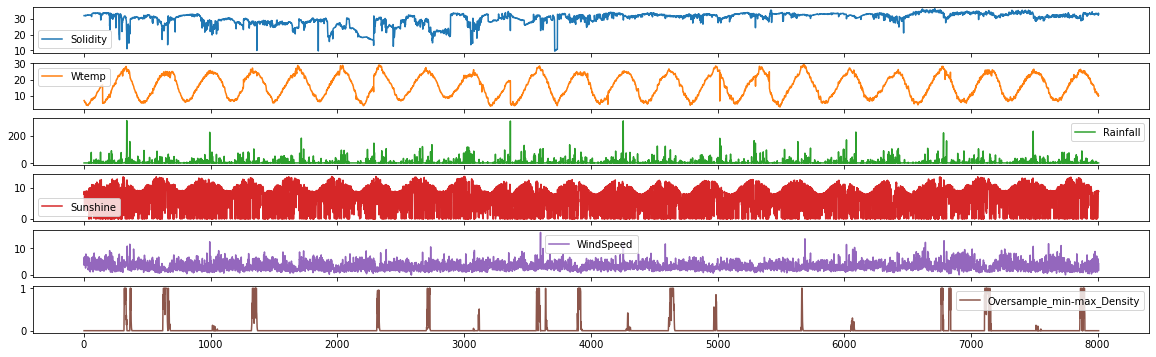

In [ ]:
features.plot(subplots=True)

## <데이터 정규화> ##

In [ ]:
# feature 값을 np matrix로 나타냄
dataset = features.values
dataset

array([[31.9,  7. ,  0. ,  8. ,  6.4,  0. ],
       [31.9,  6.8,  0. ,  8.8,  3.7,  0. ],
       [31.9,  6.8,  0. ,  7.8,  3.5,  0. ],
       ...,
       [32.1, 10. ,  0. ,  9. ,  4. ,  0. ],
       [33.4,  9.9,  0. ,  8.6,  1.5,  0. ],
       [32.9, 10.1,  0. ,  8.8,  4.1,  0. ]])

In [ ]:
dataset.shape

(8009, 6)

In [ ]:
dataset[:,:len(groups)-1]

array([[31.9,  7. ,  0. ,  8. ,  6.4],
       [31.9,  6.8,  0. ,  8.8,  3.7],
       [31.9,  6.8,  0. ,  7.8,  3.5],
       ...,
       [32.1, 10. ,  0. ,  9. ,  4. ],
       [33.4,  9.9,  0. ,  8.6,  1.5],
       [32.9, 10.1,  0. ,  8.8,  4.1]])

In [ ]:
data_mean = dataset[:TRAIN_SPLIT,:len(groups)-1].mean(axis=0) 
data_std = dataset[:TRAIN_SPLIT,:len(groups)-1].std(axis=0)
dataset[:,:len(groups)-1] = (dataset[:,:len(groups)-1] - data_mean)/data_std

8009


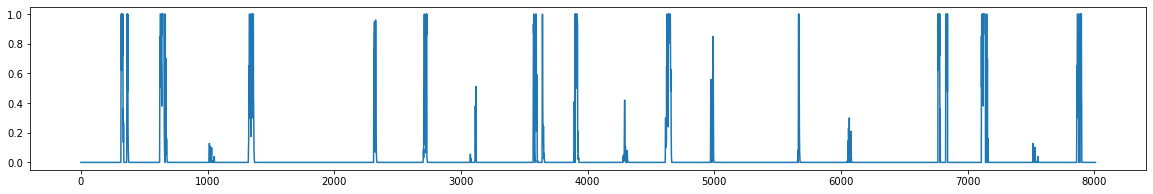

In [ ]:
plt.figure(figsize=(20,3))
plt.plot(dataset[:,len(groups)-1])

## <LSTM 데이터 적용> ##

### Iteration 변수 설정

In [ ]:
EPOCHS = 100
BATCH_SIZE = 16
BUFFER_SIZE = 10000

### 각종 함수 선언

In [ ]:
def create_time_steps(length):
    return list(range(-length,0))

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size, 
                      target_size, step, single_step=False):
    
    data = []
    labels = []
    
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i+target_size])
            
    return np.array(data), np.array(labels)

In [ ]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,3))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo', 
             label = 'True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro', 
                 label = 'Predicted Future')
    
    plt.legend(loc = 'upper left')
    plt.show()

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label = 'Training loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
    plt.title(title)
    plt.legend()
    
    plt.show()

## Multi step model - 2days

In [ ]:
past_history = 30 # n일간의 데이터 조회
future_target = 3 # n일의 결과 예측
STEP = 1 # time stamp

from sklearn.model_selection import train_test_split
x_train_multi, y_train_multi = multivariate_data(dataset[:,:len(groups)-1], dataset[:,len(groups)-1], 0, TRAIN_SPLIT, 
                                                 past_history, future_target, STEP)

x_val_multi, y_val_multi = multivariate_data(dataset[:,:len(groups)-1], dataset[:,len(groups)-1], TRAIN_SPLIT, 
                                             None, past_history, future_target, STEP)

# x_test_multi, x_val_multi, y_test_multi, y_val_multi = train_test_split(x_val_multi, y_val_multi, test_size = 0.5)

# print(len(x_test_multi), len(x_val_multi), len(y_test_multi), len(y_val_multi))

In [ ]:
dataset[:,:5]

array([[ 0.61581074, -1.29093948, -0.26355957,  0.39273935,  2.33293146],
       [ 0.61581074, -1.31995065, -0.26355957,  0.59380667,  0.41984756],
       [ 0.61581074, -1.31995065, -0.26355957,  0.34247253,  0.27813765],
       ...,
       [ 0.66766765, -0.85577192, -0.26355957,  0.6440735 ,  0.63241244],
       [ 1.00473759, -0.87027751, -0.26355957,  0.54353984, -1.13896153],
       [ 0.8750953 , -0.84126634, -0.26355957,  0.59380667,  0.7032674 ]])

In [ ]:
dataset[:,len(groups)-1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\nTarget Density to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (30, 5)

Target Density to predict : (3,)


In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(len(dataset)-TRAIN_SPLIT).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(len(dataset)-TRAIN_SPLIT).repeat()

In [ ]:
tf.random.set_seed(0)
model = tf.keras.models.Sequential()
####################################Model Layers###########################################
model.add(tf.keras.layers.LSTM(16,activation = 'relu',input_shape = x_train_multi.shape[-2:]))
model.add(tf.keras.layers.Dense(3)) # <- 예측 갯수에 따라서 dense 값 수정 할 것(현재 3일 예측)

adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='mse')

In [ ]:
for x, y in val_data_multi.take(1):
    print(model.predict(x).shape)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 1)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='a', save_best_only=True)


(1430, 3)


In [ ]:
##########모델생성###############
history = model.fit(train_data_multi, epochs = EPOCHS,
                                          batch_size = BATCH_SIZE,
                                          steps_per_epoch = len(dataset)/BATCH_SIZE, 
                                          validation_data = val_data_multi, validation_steps = 14, callbacks = [es,mc])

Epoch 1/100
500/500 [==============================] - 15s 30ms/step - loss: 0.0228 - val_loss: 0.0338
Epoch 2/100
500/500 [==============================] - 15s 30ms/step - loss: 0.0079 - val_loss: 0.0345
Epoch 00002: early stopping


# 적조 예측

In [ ]:
# y값 -> 실제 값 DataFrame에 저장

y_np_array = np.array(y)
real_value = pd.DataFrame(y_np_array)
real_value

In [ ]:
# multi_step_model.predict 값 -> 예측 값 DataFrame에 저장
predict_value = pd.DataFrame(model.predict(x))
predict_value


In [ ]:
result = pd.concat([real_value,predict_value], axis=1)
result.columns = ['real_1','real_2','real','predict_1','predict_2','predict']

In [ ]:
for col in result.columns:    
    for i in range(0,len(result[col])):
        if int(result[col][i]) < 0:
            result[col][i] = 0
        if int(result[col][i]) > 1:
            result[col][i] = 1

**적조발생 수치 계산**

In [ ]:
red_tied_rate = 0.1  #적조 발생 밀도 기준치
TP = result.real[(result['real'] >= red_tied_rate) & (result['predict'] >= red_tied_rate)].count()
TN = result.real[(result['real'] < red_tied_rate) & (result['predict'] < red_tied_rate)].count()
FN = result.real[(result['real'] >= red_tied_rate) & (result['predict'] < red_tied_rate)].count()
FP = result.real[(result['real'] < red_tied_rate) & (result['predict'] >= red_tied_rate)].count()
Pr = result.real[(result['real'] >= red_tied_rate)].count()
Nr = result.real[(result['real'] < red_tied_rate)].count()
Pp = result.real[(result['predict'] >= red_tied_rate)].count()
Np = result.real[(result['real'] < red_tied_rate)].count()
All = Pr + Nr

In [ ]:
TP1 = result.real[(result['real_1'] >= red_tied_rate) & (result['predict_1'] >= red_tied_rate)].count()
TN1 = result.real[(result['real_1'] < red_tied_rate) & (result['predict_1'] < red_tied_rate)].count()
FN1 = result.real[(result['real_1'] >= red_tied_rate) & (result['predict_1'] < red_tied_rate)].count()
FP1 = result.real[(result['real_1'] < red_tied_rate) & (result['predict_1'] >= red_tied_rate)].count()
Pr1 = result.real[(result['real_1'] >= red_tied_rate)].count()
Nr1 = result.real[(result['real_1'] < red_tied_rate)].count()
Pp1 = result.real[(result['predict_1'] >= red_tied_rate)].count()
Np1 = result.real[(result['real_1'] < red_tied_rate)].count()
All1 = Pr1 + Nr1

In [ ]:
TP2 = result.real[(result['real_2'] >= red_tied_rate) & (result['predict_2'] >= red_tied_rate)].count()
TN2 = result.real[(result['real_2'] < red_tied_rate) & (result['predict_2'] < red_tied_rate)].count()
FN2 = result.real[(result['real_2'] >= red_tied_rate) & (result['predict_2'] < red_tied_rate)].count()
FP2 = result.real[(result['real_2'] < red_tied_rate) & (result['predict_2'] >= red_tied_rate)].count()
Pr2 = result.real[(result['real_2'] >= red_tied_rate)].count()
Nr2 = result.real[(result['real_2'] < red_tied_rate)].count()
Pp2 = result.real[(result['predict_2'] >= red_tied_rate)].count()
Np2 = result.real[(result['real_2'] < red_tied_rate)].count()
All2 = Pr2 + Nr2

**1일차 적조 예측**

In [ ]:
print("TP = {}".format(TP))
print("TN = {}".format(TN))
print("FN = {}".format(FN))
print("FP = {}".format(FP))
print("Pr = {}".format(Pr))
print("Nr = {}".format(Nr))
print("Pp = {}".format(Pp))
print("Np = {}".format(Np))
print("All = {}".format(All))

TP = 104
TN = 1195
FN = 7
FP = 124
Pr = 111
Nr = 1319
Pp = 228
Np = 1319
All = 1430


In [ ]:
Precision = TP /(TP+FP)
Recall = TP /(TP+FN)
F1_Score = (2*Precision*Recall) / (Precision + Recall)
print("Precision = {}".format(Precision))
print("Recall = {}".format(Recall))
print("F1_Score = {}".format(F1_Score))

Precision = 0.45614035087719296
Recall = 0.9369369369369369
F1_Score = 0.6135693215339233


In [ ]:
print("Accuracy = {}".format((TP+TN)/ All))
print("Error Rate = {}".format((FP+FN)/ All))
print("Sensitivity = {}".format(TP /Pr))
print("Specificity = {}".format(TN /Nr))
print("Precision = {}".format(Precision))
print("Recall = {}".format(Recall))
print("F1_Score = {}".format(F1_Score))

Accuracy = 0.9083916083916084
Error Rate = 0.09160839160839161
Sensitivity = 0.9369369369369369
Specificity = 0.9059893858984079
Precision = 0.45614035087719296
Recall = 0.9369369369369369
F1_Score = 0.6135693215339233


<AxesSubplot:>

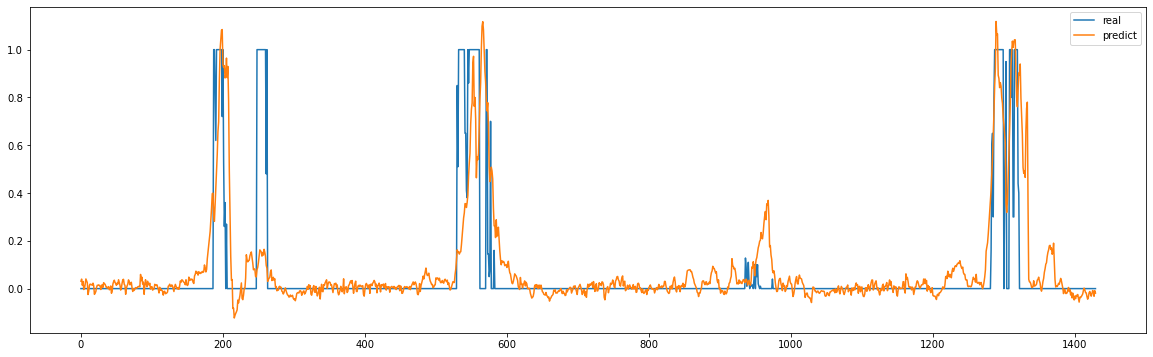

In [ ]:
result[['real','predict']].plot()

**2일차 적조 예측**

In [ ]:
print("TP1 = {}".format(TP1))
print("TN1 = {}".format(TN1))
print("FN1 = {}".format(FN1))
print("FP1 = {}".format(FP1))
print("Pr1 = {}".format(Pr1))
print("Nr1 = {}".format(Nr1))
print("Pp1 = {}".format(Pp1))
print("Np1 = {}".format(Np1))
print("All1 = {}".format(All1))

TP1 = 100
TN1 = 1207
FN1 = 11
FP1 = 112
Pr1 = 111
Nr1 = 1319
Pp1 = 212
Np1 = 1319
All1 = 1430


In [ ]:
Precision1 = TP1 /(TP1+FP1)
Recall1 = TP1 /(TP1+FN1)
F1_Score1 = (2*Precision1*Recall1) / (Precision1 + Recall1)
print("Precision1 = {}".format(Precision1))
print("Recall1 = {}".format(Recall1))
print("F1_Score1 = {}".format(F1_Score1))

Precision1 = 0.4716981132075472
Recall1 = 0.9009009009009009
F1_Score1 = 0.6191950464396284


In [ ]:
print("Accuracy1 = {}".format((TP1+TN1)/ All1))
print("Error Rate1 = {}".format((FP1+FN1)/ All1))
print("Sensitivity1 = {}".format(TP1 /Pr1))
print("Specificity1 = {}".format(TN1 /Nr1))
print("Precision1 = {}".format(Precision1))
print("Recall1 = {}".format(Recall1))
print("F1_Score1 = {}".format(F1_Score1))

Accuracy1 = 0.913986013986014
Error Rate1 = 0.08601398601398601
Sensitivity1 = 0.9009009009009009
Specificity1 = 0.9150871872630781
Precision1 = 0.4716981132075472
Recall1 = 0.9009009009009009
F1_Score1 = 0.6191950464396284


<AxesSubplot:>

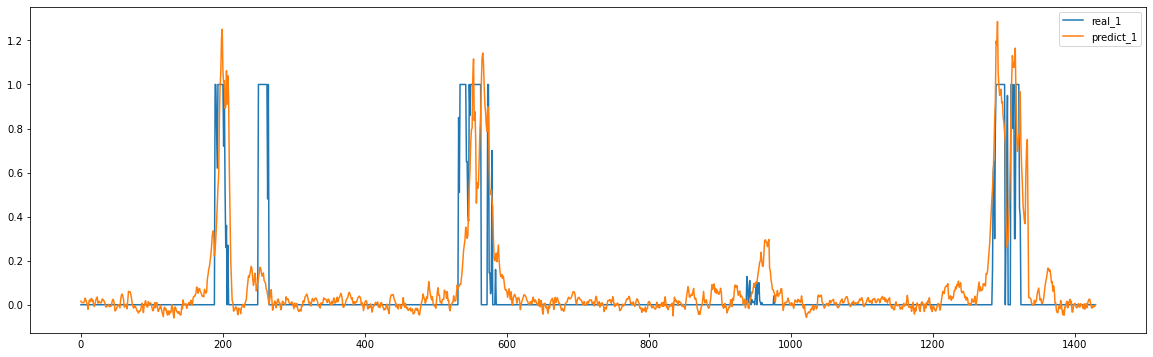

In [ ]:
result[['real_1','predict_1']].plot()

**3일차 적조 예측**

In [ ]:
print("TP2 = {}".format(TP2))
print("TN2 = {}".format(TN2))
print("FN2 = {}".format(FN2))
print("FP2 = {}".format(FP2))
print("Pr2 = {}".format(Pr2))
print("Nr2 = {}".format(Nr2))
print("Pp2 = {}".format(Pp2))
print("Np2 = {}".format(Np2))
print("All2 = {}".format(All2))

TP2 = 107
TN2 = 1164
FN2 = 4
FP2 = 155
Pr2 = 111
Nr2 = 1319
Pp2 = 262
Np2 = 1319
All2 = 1430


In [ ]:
Precision2 = TP2 /(TP2+FP2)
Recall2 = TP2 /(TP2+FN2)
F1_Score2 = (2*Precision2*Recall2) / (Precision2 + Recall2)
print("Precision2 = {}".format(Precision2))
print("Recall2 = {}".format(Recall2))
print("F1_Score2 = {}".format(F1_Score2))

Precision2 = 0.4083969465648855
Recall2 = 0.963963963963964
F1_Score2 = 0.5737265415549598


In [ ]:
print("Accuracy2 = {}".format((TP2+TN2)/ All2))
print("Error Rate2 = {}".format((FP2+FN2)/ All2))
print("Sensitivity2 = {}".format(TP2 /Pr2))
print("Specificity2 = {}".format(TN2 /Nr2))
print("Precision2 = {}".format(Precision2))
print("Recall2 = {}".format(Recall2))
print("F1_Score2 = {}".format(F1_Score2))

Accuracy2 = 0.8888111888111888
Error Rate2 = 0.11118881118881119
Sensitivity2 = 0.963963963963964
Specificity2 = 0.8824867323730099
Precision2 = 0.4083969465648855
Recall2 = 0.963963963963964
F1_Score2 = 0.5737265415549598


<AxesSubplot:>

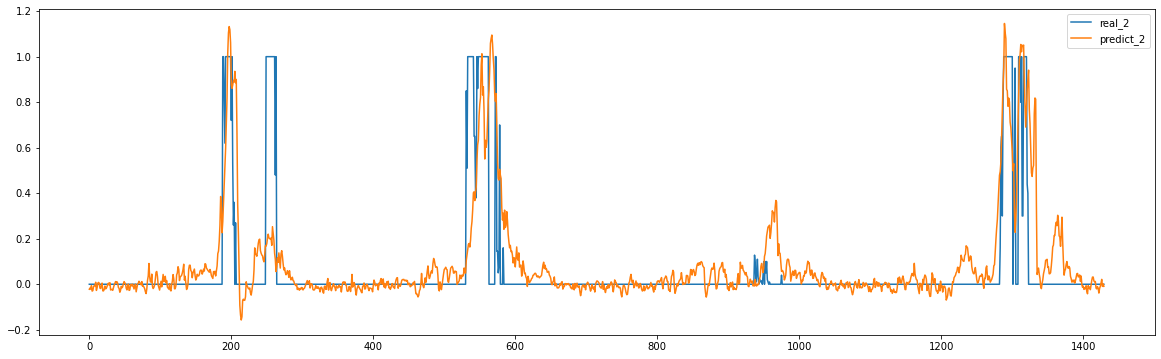

In [ ]:
result[['real_2','predict_2']].plot()

# ===============================================================

### 5.2 적도 데이터 크롤링 코드 ###

JOISS 포털의 자료 연계를 수행하면 아래 사이트에 접속이 됩니다.

공공데이터포털에서 해양수산부 국립수산과학원_적조정보 
https://www.data.go.kr/iim/api/selectAPIAcountView.do

해당 페이지에서 활용 신청을 하여서 API KEY를 받으셔서 아래 코드로 크롤링을 수행하시면 됩니다.

*본 코드에 나와있는 API KEY는 활용 중지 처리함*

In [ ]:
import pandas as pd
import numpy as np
import time
import requests
from bs4 import BeautifulSoup
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
}
import xml.etree.ElementTree as ET
from urllib.request import urlopen
from urllib.error import HTTPError

for year in years:
    rows = []
    for month in months:
        for day in days:
            urls = "http://apis.data.go.kr/1520635/OceanProblemService/getOceanproblemRedTideOccurrenceSpot?serviceKey=RdqFoDTbtn1PKRrHToEKoZS2KBuI9IM5GMlfmSkv9Azu0hS6lxD1%2FbUwvO45%2Fx6K8BqyNxPL%2FrF5n%2FdGX9O8%2Bw%3D%3D&numOfRows=99&pageNo=1&regdate={:04d}{:02d}{:02d}".format(year,month,day)
            #키 변경해야합니다.
            try:
                response = urlopen(urls).read().decode("utf-8")
                xtree = ET.fromstring(response)
            except HTTPError :
                print("HTTPError : ",year, month, day)
                continue
            for node in xtree[1][0]:
                try:
                    n_dname = node.find("dname").text
                    n_edensity = node.find("edensity").text
                    n_ewt = node.find("ewt").text
                    n_oarea = node.find("oarea").text
                    n_regdate = node.find("regdate").text
                    n_sdensity = node.find("sdensity").text
                    n_srcode = node.find("srcode").text
                    n_swt = node.find("swt").text

                    rows.append({"dname" : n_dname,
                                 "edensity" : n_edensity,
                                 "ewt" : n_ewt,
                                 "oarea" : n_oarea, 
                                 "regdate" : n_regdate,
                                 "sdensity" : n_sdensity, 
                                 "srcode" : n_srcode, 
                                 "swt" : n_swt})
                except AttributeError:
                    print("AttributeError : ",year, month, day)
                    continue
    df = pd.DataFrame(rows, columns = columns)
    df.to_csv(str(year)+".csv")
    print(year," complete!")